In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import warnings

warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv(
    "D:/Practice/Udemy/Beginner_to_advanced_mlops_sudhanshu/hotel_reservation_project/artifacts/raw/train.csv"
)
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,10760,INN10761,2,1,0,1,Meal Plan 1,0,Room_Type 1,0,2018,2,18,Online,0,0,0,109.00,0,Not_Canceled
1,2300,INN02301,2,0,2,2,Not Selected,0,Room_Type 1,161,2018,7,31,Online,0,0,0,91.38,0,Canceled
2,16987,INN16988,2,0,0,1,Meal Plan 1,0,Room_Type 2,107,2017,8,12,Online,0,0,0,90.00,1,Not_Canceled
3,7388,INN07389,2,0,0,3,Not Selected,0,Room_Type 1,113,2018,6,9,Online,0,0,0,116.10,1,Not_Canceled
4,1169,INN01170,1,0,2,5,Meal Plan 1,0,Room_Type 1,20,2017,11,11,Online,0,0,0,68.85,1,Not_Canceled


In [ ]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [7]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,0,1,Meal Plan 1,0,Room_Type 1,0,2018,2,18,Online,0,0,0,109.00,0,Not_Canceled
1,2,0,2,2,Not Selected,0,Room_Type 1,161,2018,7,31,Online,0,0,0,91.38,0,Canceled
2,2,0,0,1,Meal Plan 1,0,Room_Type 2,107,2017,8,12,Online,0,0,0,90.00,1,Not_Canceled
3,2,0,0,3,Not Selected,0,Room_Type 1,113,2018,6,9,Online,0,0,0,116.10,1,Not_Canceled
4,1,0,2,5,Meal Plan 1,0,Room_Type 1,20,2017,11,11,Online,0,0,0,68.85,1,Not_Canceled


In [9]:
df.shape

(29020, 18)

In [10]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(7705)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(21315, 18)

In [14]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15167
Canceled         6148
Name: count, dtype: int64

###### Our data is imbalanced

In [16]:
cat_cols = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest",
    "booking_status",
]

num_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests",
]

### DATA ANALYSIS

In [17]:
data = df.copy()

In [18]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,0,1,Meal Plan 1,0,Room_Type 1,0,2018,2,18,Online,0,0,0,109.00,0,Not_Canceled
1,2,0,2,2,Not Selected,0,Room_Type 1,161,2018,7,31,Online,0,0,0,91.38,0,Canceled
2,2,0,0,1,Meal Plan 1,0,Room_Type 2,107,2017,8,12,Online,0,0,0,90.00,1,Not_Canceled
3,2,0,0,3,Not Selected,0,Room_Type 1,113,2018,6,9,Online,0,0,0,116.10,1,Not_Canceled
4,1,0,2,5,Meal Plan 1,0,Room_Type 1,20,2017,11,11,Online,0,0,0,68.85,1,Not_Canceled


##### UNIVARIATE ANALYSIS

In [19]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

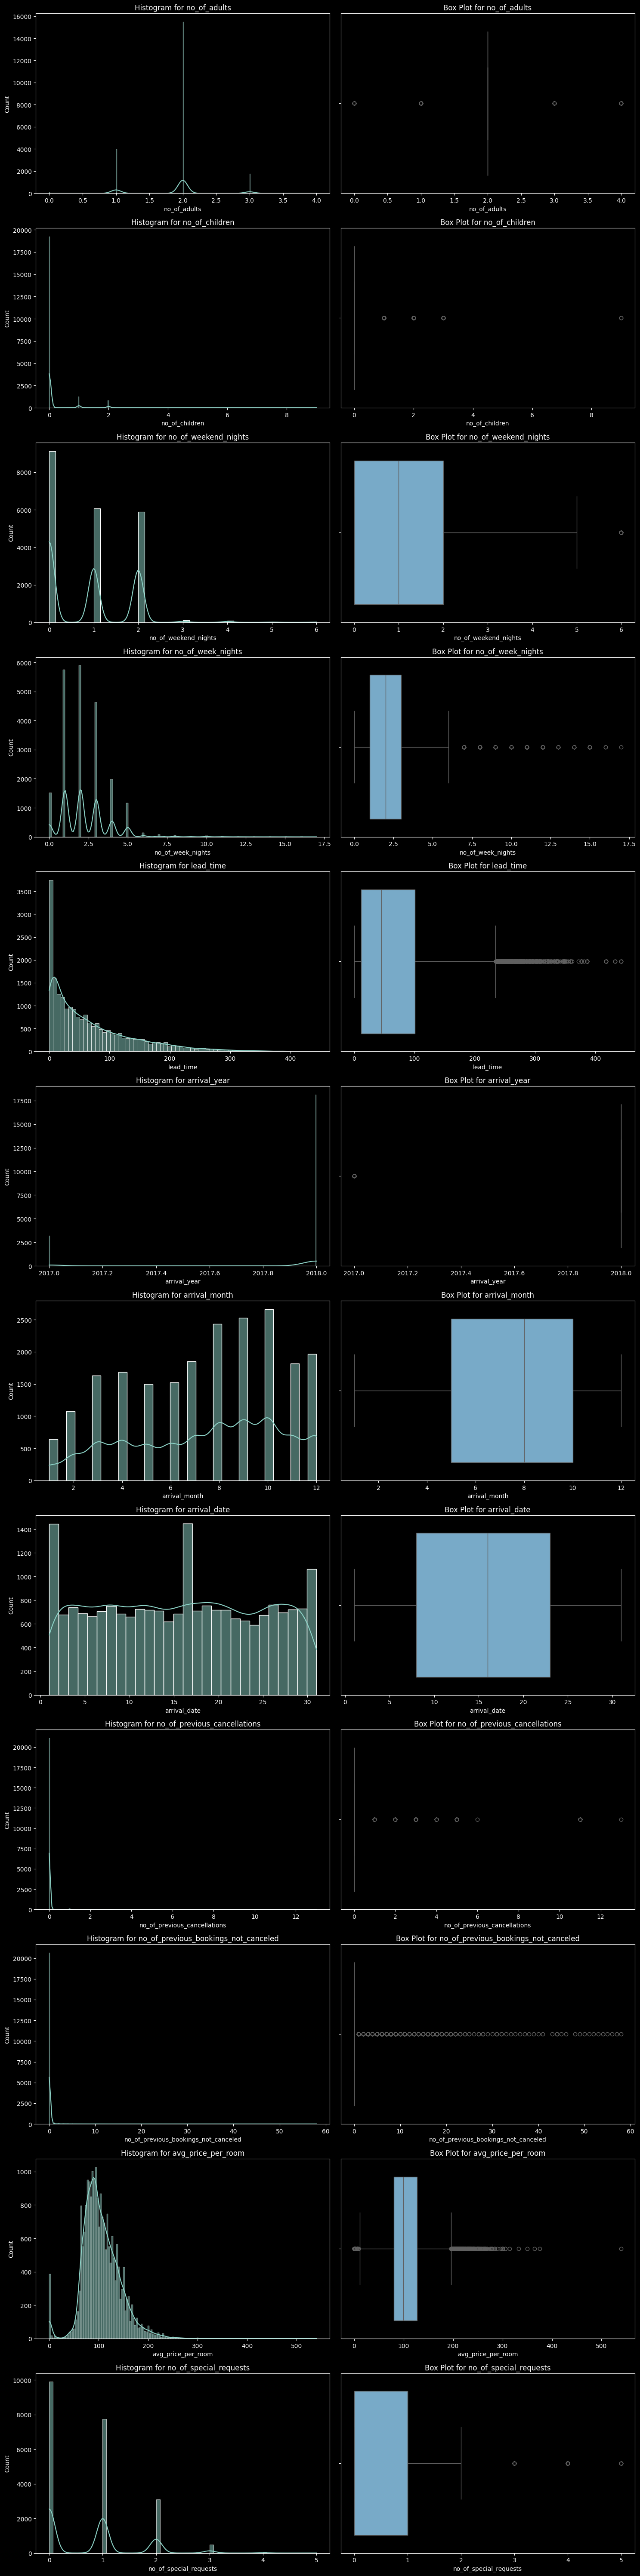

In [20]:
num_plot_dist(data, num_cols)

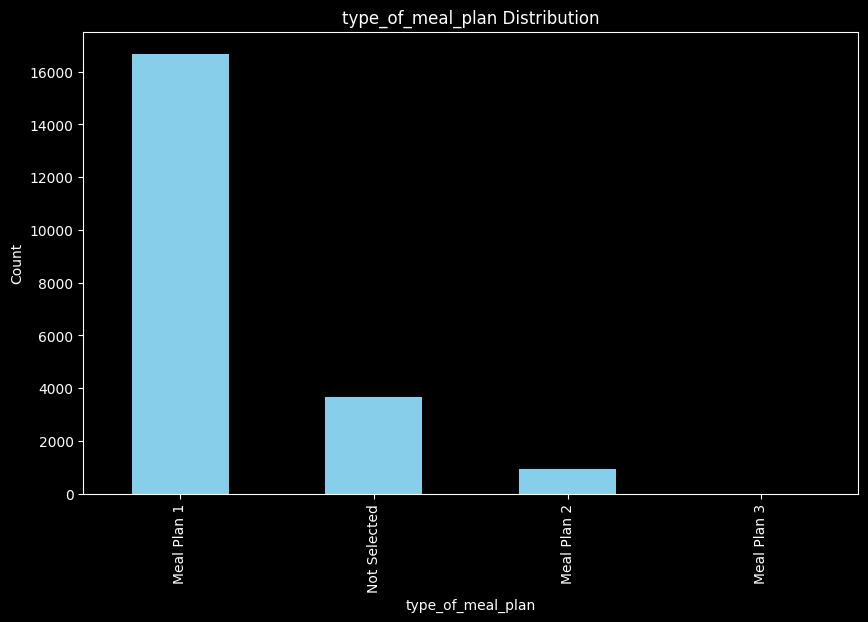

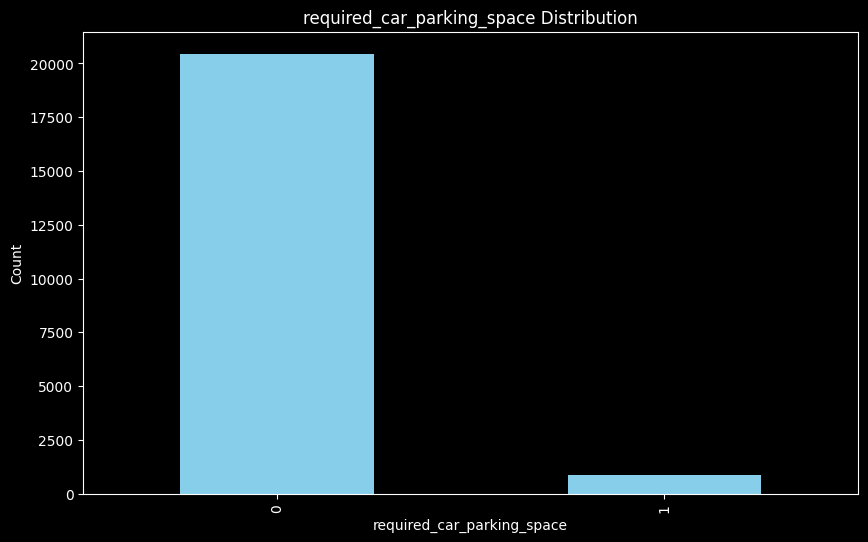

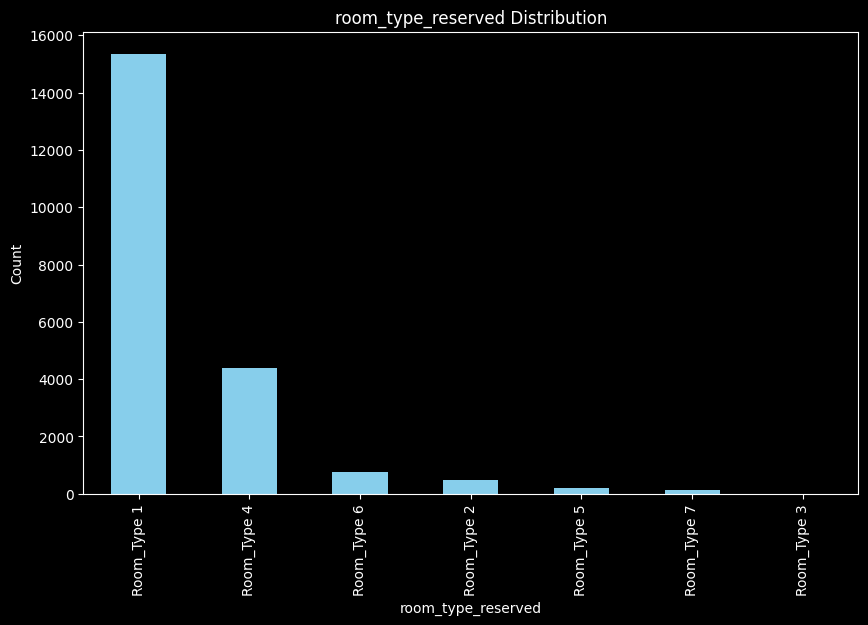

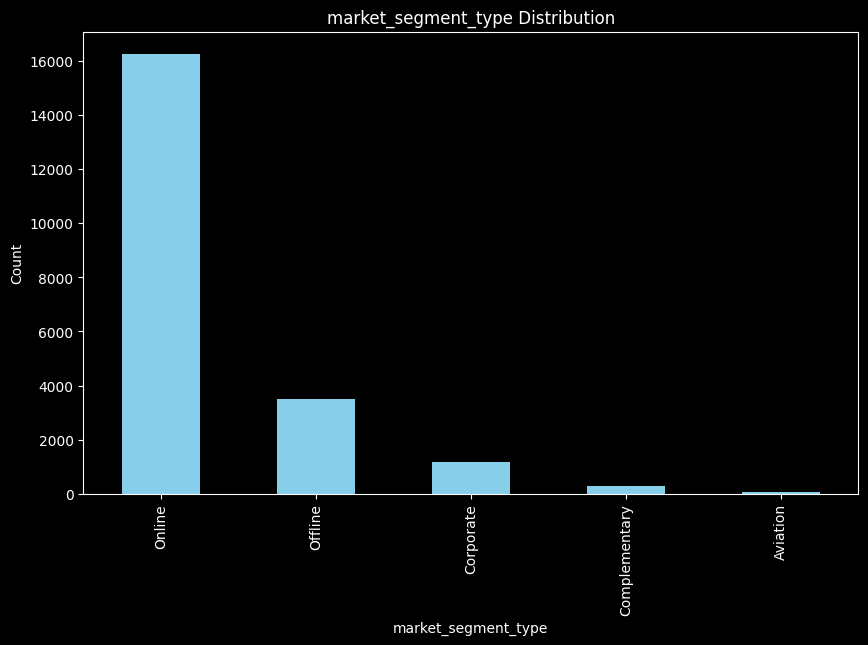

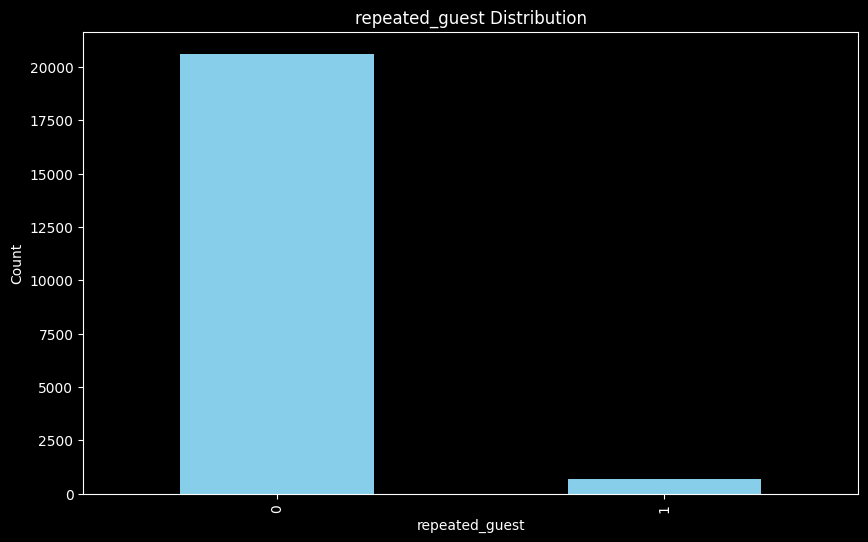

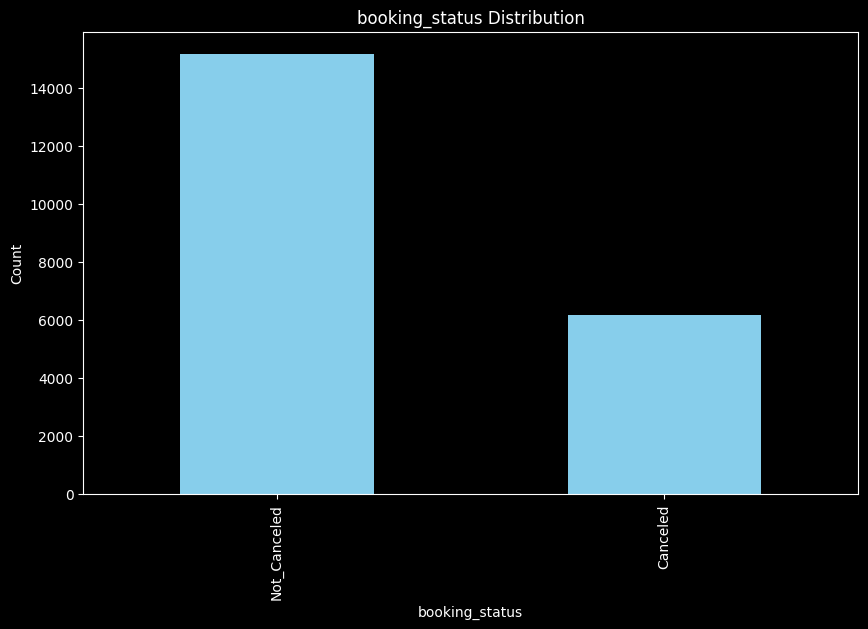

In [21]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind="bar", color="skyblue")
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [24]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

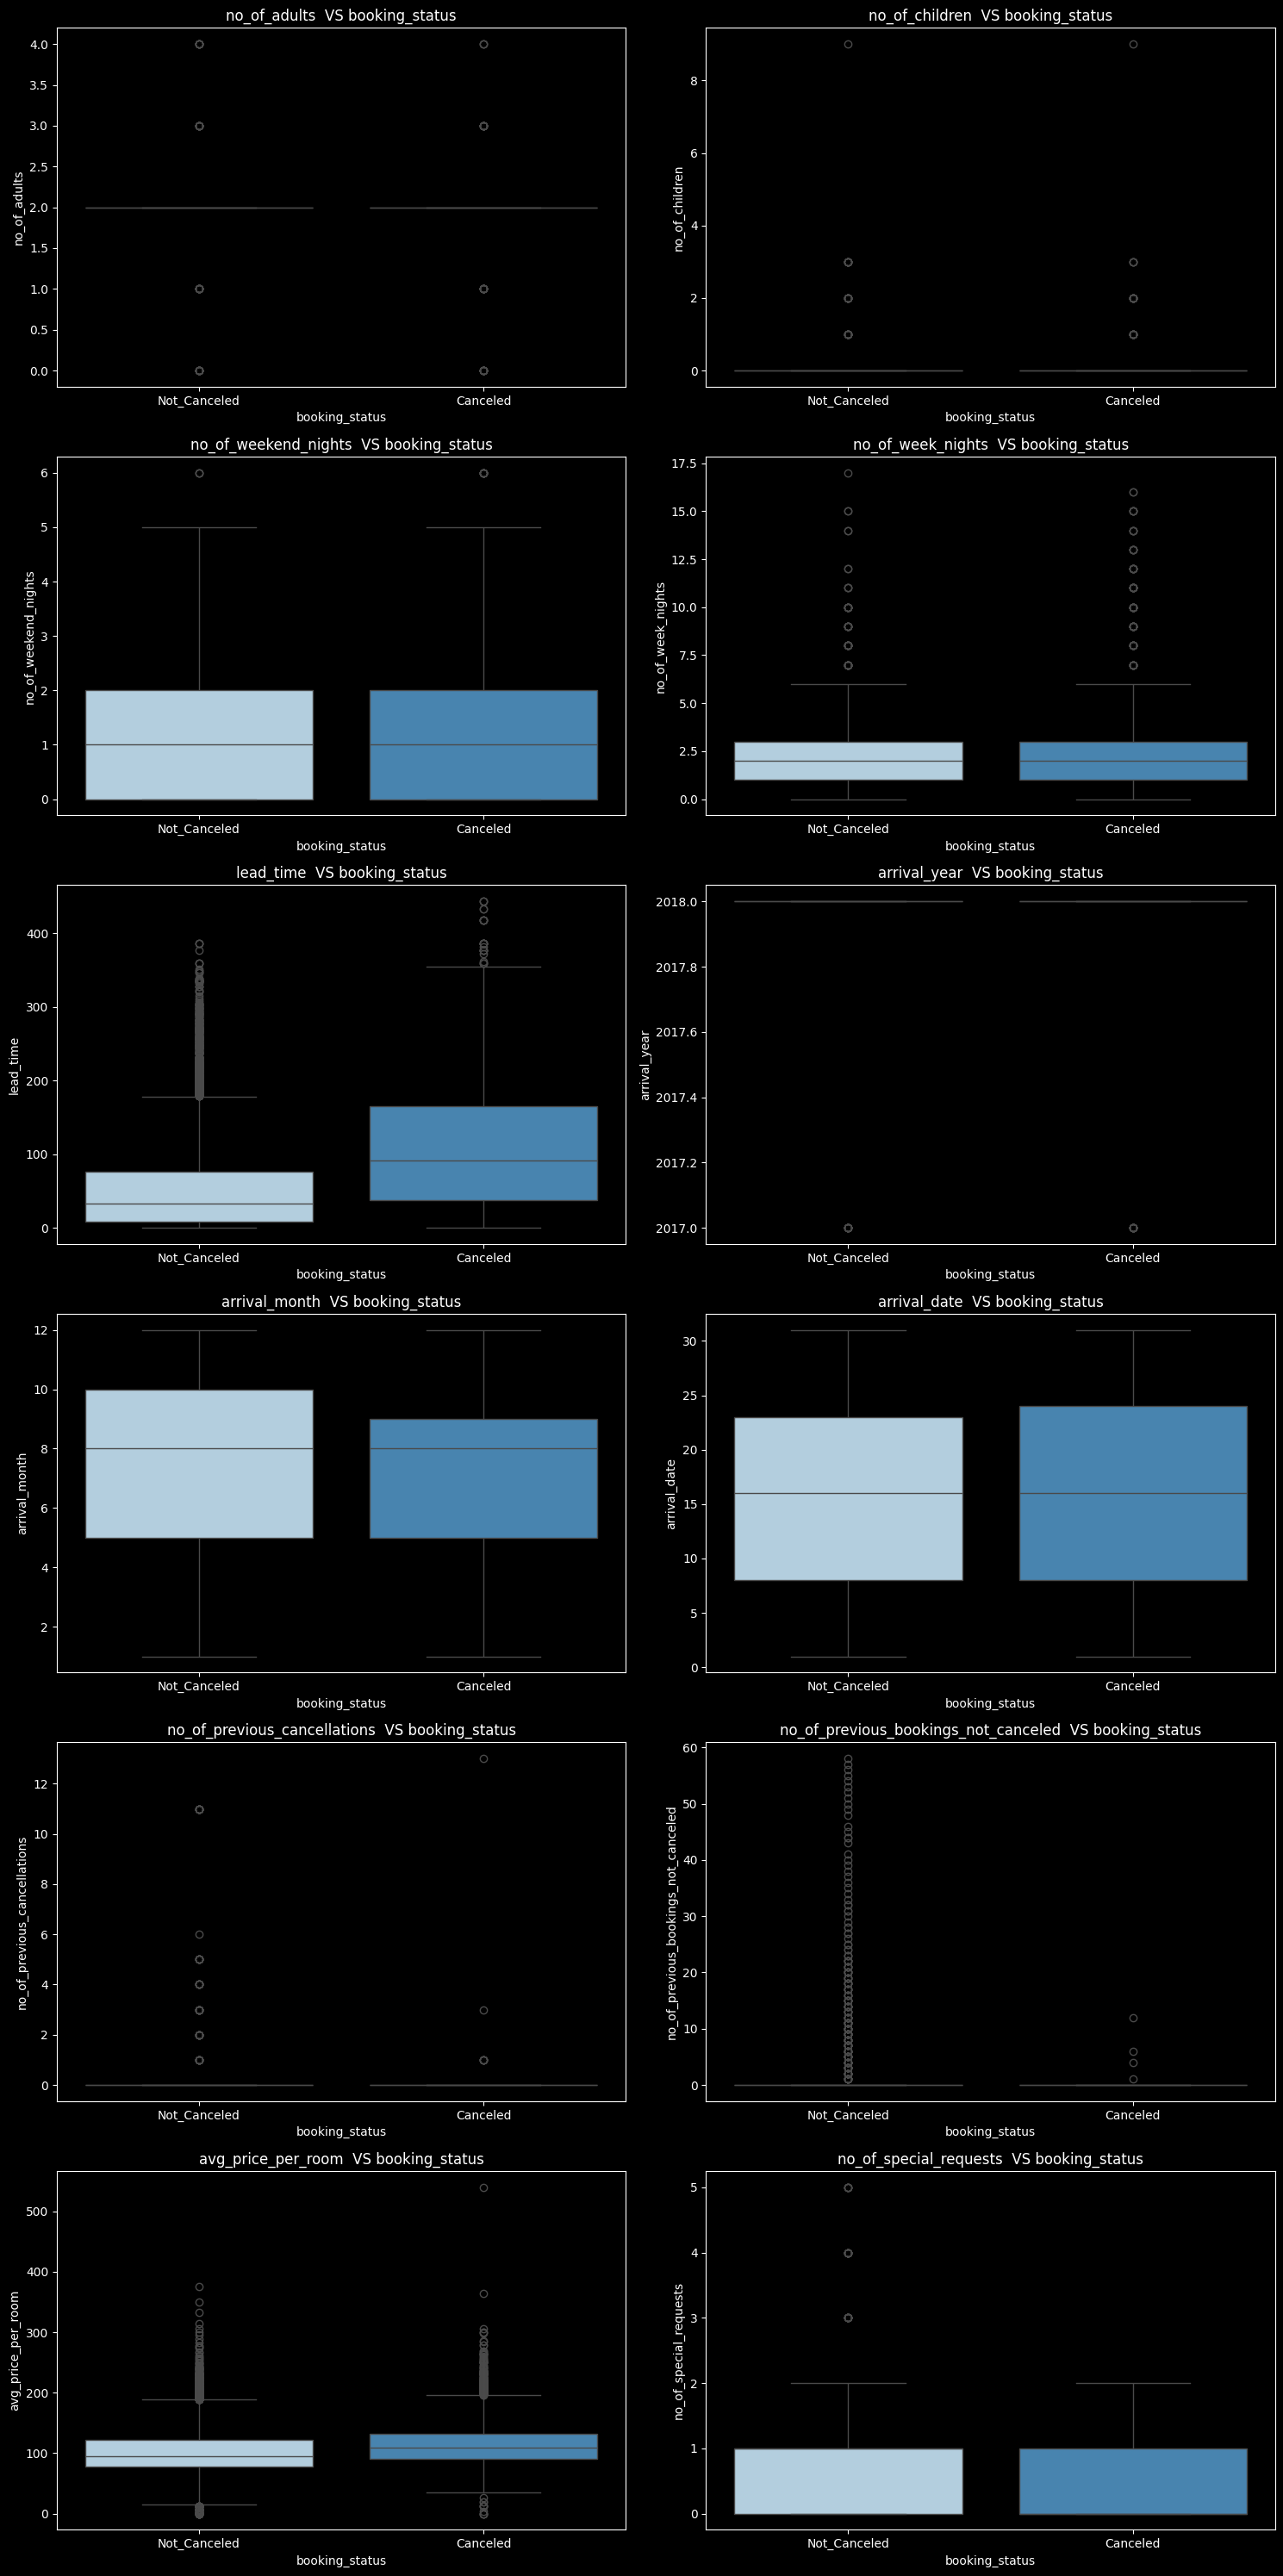

In [25]:
plot_bivariate_num(data, "booking_status", num_cols)

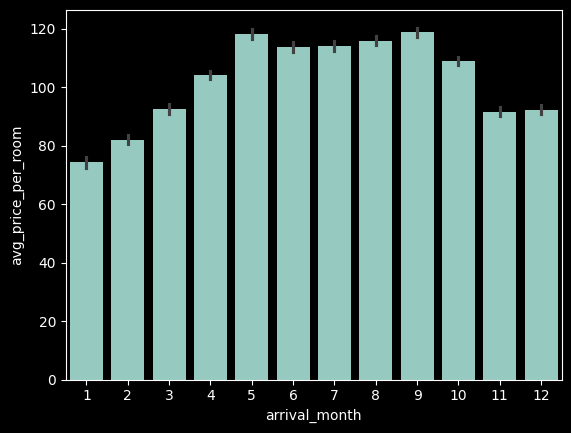

In [26]:
sns.barplot(x="arrival_month", y="avg_price_per_room", data=data)
plt.show()

In [27]:
def plot_bivaraite_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()

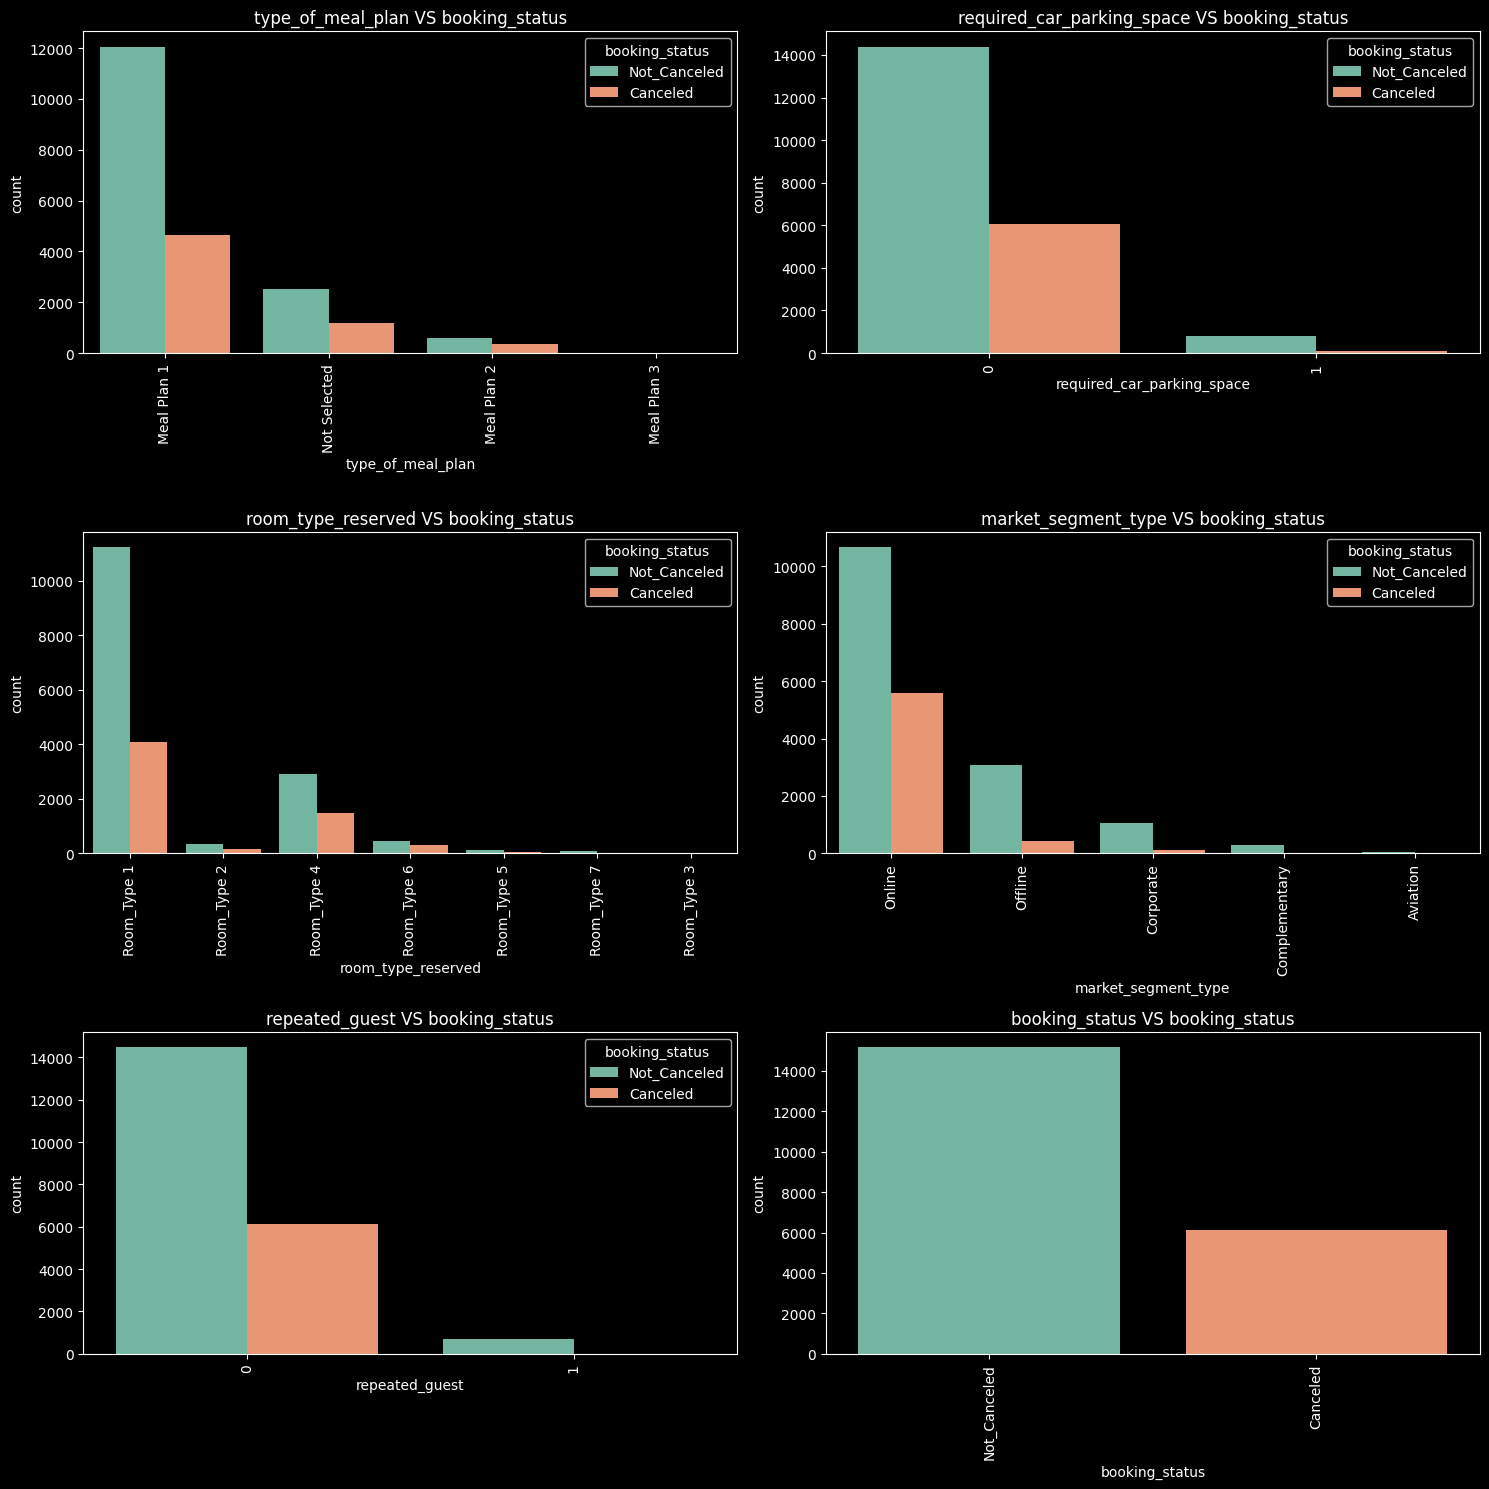

In [28]:
plot_bivaraite_cat(data, "booking_status", cat_cols)

#### DATA PROCESSING

In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,0,1,Meal Plan 1,0,Room_Type 1,0,2018,2,18,Online,0,0,0,109.00,0,Not_Canceled
1,2,0,2,2,Not Selected,0,Room_Type 1,161,2018,7,31,Online,0,0,0,91.38,0,Canceled
2,2,0,0,1,Meal Plan 1,0,Room_Type 2,107,2017,8,12,Online,0,0,0,90.00,1,Not_Canceled
3,2,0,0,3,Not Selected,0,Room_Type 1,113,2018,6,9,Online,0,0,0,116.10,1,Not_Canceled
4,1,0,2,5,Meal Plan 1,0,Room_Type 1,20,2017,11,11,Online,0,0,0,68.85,1,Not_Canceled


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21315 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21315 non-null  int64  
 1   no_of_children                        21315 non-null  int64  
 2   no_of_weekend_nights                  21315 non-null  int64  
 3   no_of_week_nights                     21315 non-null  int64  
 4   type_of_meal_plan                     21315 non-null  object 
 5   required_car_parking_space            21315 non-null  int64  
 6   room_type_reserved                    21315 non-null  object 
 7   lead_time                             21315 non-null  int64  
 8   arrival_year                          21315 non-null  int64  
 9   arrival_month                         21315 non-null  int64  
 10  arrival_date                          21315 non-null  int64  
 11  market_segment_type 

In [31]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {
        label: code
        for label, code in zip(
            label_encoder.classes_, label_encoder.transform(label_encoder.classes_)
        )
    }

In [33]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [34]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,0,1,0,0,0,0,2018,2,18,4,0,0,0,109.00,0,1
1,2,0,2,2,3,0,0,161,2018,7,31,4,0,0,0,91.38,0,0
2,2,0,0,1,0,0,1,107,2017,8,12,4,0,0,0,90.00,1,1
3,2,0,0,3,3,0,0,113,2018,6,9,4,0,0,0,116.10,1,1
4,1,0,2,5,0,0,0,20,2017,11,11,4,0,0,0,68.85,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21315 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21315 non-null  int64  
 1   no_of_children                        21315 non-null  int64  
 2   no_of_weekend_nights                  21315 non-null  int64  
 3   no_of_week_nights                     21315 non-null  int64  
 4   type_of_meal_plan                     21315 non-null  int64  
 5   required_car_parking_space            21315 non-null  int64  
 6   room_type_reserved                    21315 non-null  int64  
 7   lead_time                             21315 non-null  int64  
 8   arrival_year                          21315 non-null  int64  
 9   arrival_month                         21315 non-null  int64  
 10  arrival_date                          21315 non-null  int64  
 11  market_segment_type 

In [36]:
### Multicollinearity

In [38]:
# !pip install statsmodels

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [40]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [41]:
vif_data

,feature,VIF
0,const,4.125072e+07
1,no_of_adults,1.339135e+00
2,no_of_children,1.281769e+00
3,no_of_weekend_nights,1.075314e+00
4,no_of_week_nights,1.129082e+00
5,type_of_meal_plan,1.177163e+00
6,required_car_parking_space,1.032705e+00
7,room_type_reserved,1.558849e+00
8,lead_time,1.398669e+00
9,arrival_year,1.289600e+00


#### Our data dont have any multicollinearity

In [42]:
corr = df.corr()

In [43]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.042453,0.085983,0.112062,-0.003112,-0.004435,0.276937,0.154981,0.097725,0.012527,0.021044,0.312148,-0.242210,-0.066580,-0.148402,0.326038,0.161207,-0.095993
no_of_children,-0.042453,1.000000,0.015701,0.019715,-0.106096,0.018333,0.358857,0.007734,0.029896,0.011189,0.022914,0.097522,-0.048336,-0.021174,-0.029949,0.353393,0.093281,-0.064285
no_of_weekend_nights,0.085983,0.015701,1.000000,0.230860,-0.041308,-0.051839,0.033393,0.127048,0.030249,0.010449,0.009070,0.093894,-0.089031,-0.031426,-0.036979,0.000141,0.019390,-0.069480
no_of_week_nights,0.112062,0.019715,0.230860,1.000000,-0.080193,-0.056338,0.086689,0.218645,0.018895,0.026554,-0.006533,0.117323,-0.116497,-0.032632,-0.057725,0.015457,0.035088,-0.124684
type_of_meal_plan,-0.003112,-0.106096,-0.041308,-0.080193,1.000000,-0.021203,-0.247458,-0.049566,0.095793,0.007542,-0.004125,0.183765,-0.070078,-0.013601,-0.045646,-0.103321,-0.009330,-0.037287
required_car_parking_space,-0.004435,0.018333,-0.051839,-0.056338,-0.021203,1.000000,0.010962,-0.039363,0.006707,-0.009513,-0.006210,-0.035519,0.109296,0.026878,0.064029,0.057073,0.069484,0.086021
room_type_reserved,0.276937,0.358857,0.033393,0.086689,-0.247458,0.010962,1.000000,-0.016575,0.083356,0.004607,0.029686,0.089432,-0.047409,-0.009960,-0.022842,0.491289,0.084432,-0.075683
lead_time,0.154981,0.007734,0.127048,0.218645,-0.049566,-0.039363,-0.016575,1.000000,0.171454,0.133961,0.035464,0.142083,-0.148985,-0.053138,-0.088232,-0.039481,-0.003186,-0.367525
arrival_year,0.097725,0.029896,0.030249,0.018895,0.095793,0.006707,0.083356,0.171454,1.000000,-0.322353,0.016538,0.117996,-0.008384,0.010439,0.026701,0.174255,-0.001003,-0.155982
arrival_month,0.012527,0.011189,0.010449,0.026554,0.007542,-0.009513,0.004607,0.133961,-0.322353,1.000000,-0.019376,-0.017273,-0.007747,-0.041012,-0.011030,0.070946,0.141114,0.014825


<Axes: >

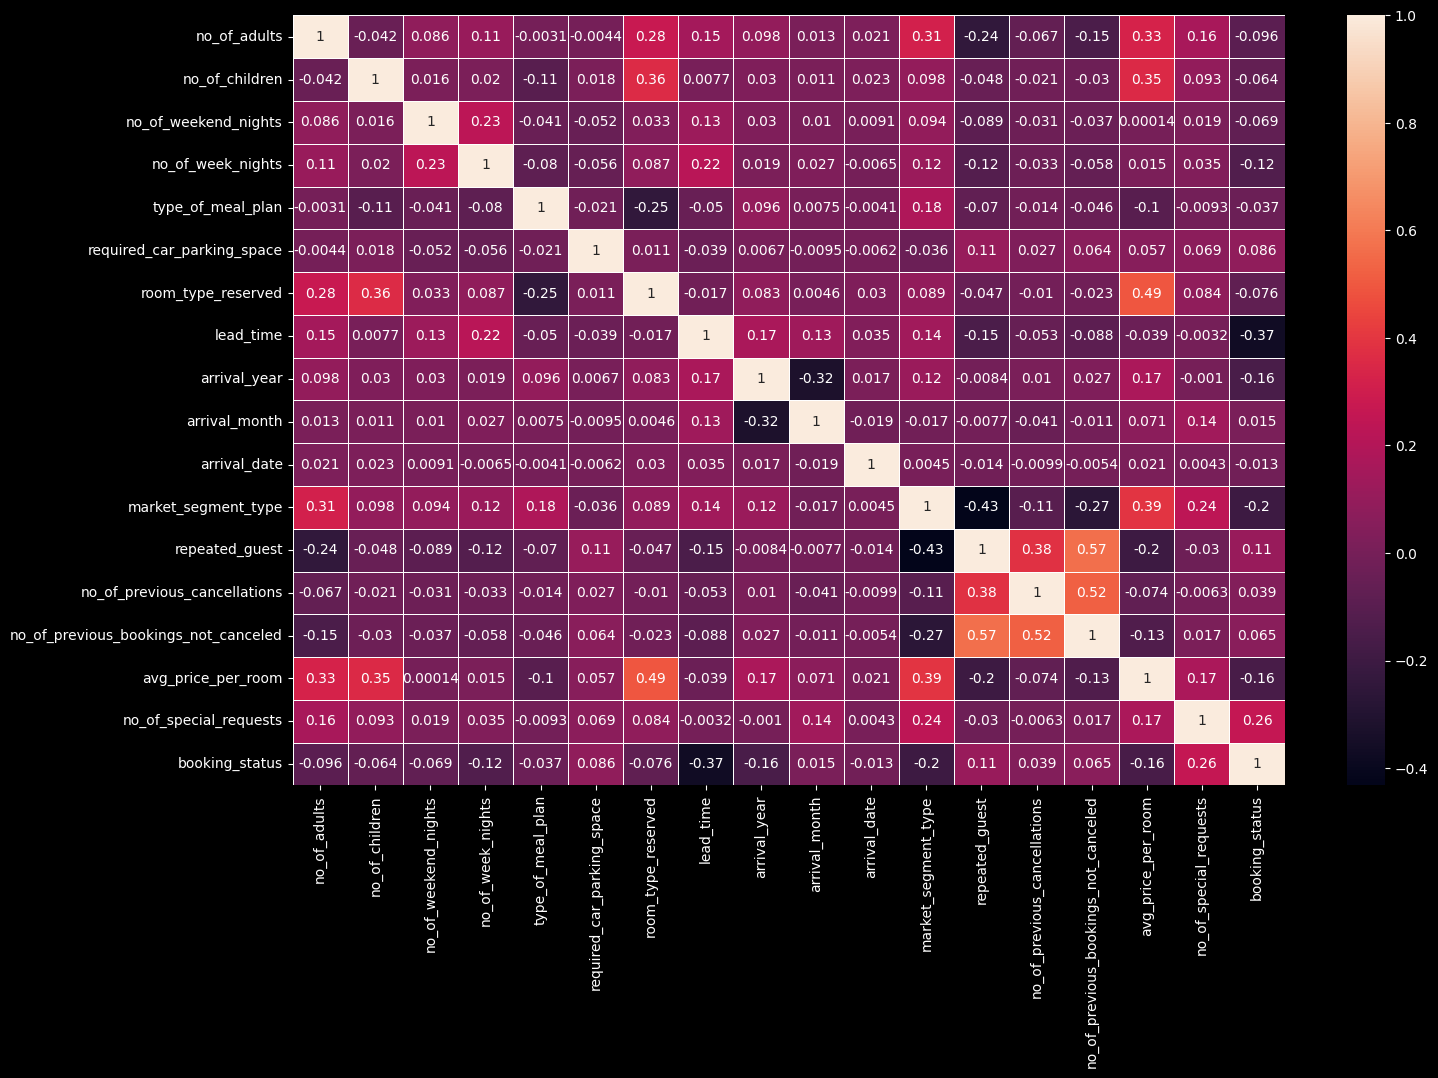

In [48]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, linewidths=0.5)

In [49]:
#### Skewness

In [50]:
skewness = df.skew()

In [51]:
skewness

no_of_adults                            -0.299420
no_of_children                           3.878765
no_of_weekend_nights                     0.661398
no_of_week_nights                        1.588607
type_of_meal_plan                        1.629507
required_car_parking_space               4.666111
room_type_reserved                       1.390545
lead_time                                1.414077
arrival_year                            -1.963755
arrival_month                           -0.294438
arrival_date                             0.014310
market_segment_type                     -2.323666
repeated_guest                           5.247032
no_of_previous_cancellations            21.998477
no_of_previous_bookings_not_canceled    15.958146
avg_price_per_room                       0.632450
no_of_special_requests                   0.923211
booking_status                          -0.934054
dtype: float64

In [52]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [53]:
#### Imablanced Data

In [54]:
df["booking_status"].value_counts()

booking_status
1    15167
0     6148
Name: count, dtype: int64

In [55]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [56]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
# !pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


In [57]:
y.value_counts()

booking_status
1    15167
0     6148
Name: count, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

In [60]:
y_res

0        1
1        0
2        1
3        1
4        1
        ..
30329    0
30330    0
30331    0
30332    0
30333    0
Name: booking_status, Length: 30334, dtype: int64

In [61]:
y_res.value_counts()

booking_status
1    15167
0    15167
Name: count, dtype: int64

In [62]:
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df["booking_status"] = y_res

In [63]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,0,1,0,0,0,0,2018,2,18,4,0.0,0.0,0.0,109.00,0,1
1,2,0,2,2,3,0,0,161,2018,7,31,4,0.0,0.0,0.0,91.38,0,0
2,2,0,0,1,0,0,1,107,2017,8,12,4,0.0,0.0,0.0,90.00,1,1
3,2,0,0,3,3,0,0,113,2018,6,9,4,0.0,0.0,0.0,116.10,1,1
4,1,0,2,5,0,0,0,20,2017,11,11,4,0.0,0.0,0.0,68.85,1,1


In [64]:
balanced_df.shape

(30334, 18)

In [65]:
df = balanced_df.copy()

In [66]:
df.shape

(30334, 18)

In [67]:
#### Feature Selection

In [68]:
len(df.columns)

18

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
feature_importance = model.feature_importances_

In [73]:
feature_importance_df = pd.DataFrame(
    {"feature": X.columns, "importance": feature_importance}
)

In [74]:
top_features_importance_df = feature_importance_df.sort_values(
    by="importance", ascending=False
)

In [75]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [76]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,0,0,109.00,2,18,4,1,0,0,0,1
1,161,0,91.38,7,31,4,2,2,3,0,0
2,107,1,90.00,8,12,4,1,0,0,1,1
3,113,1,116.10,6,9,4,3,0,3,0,1
4,20,1,68.85,11,11,4,5,2,0,0,1


In [77]:
len(top_10_df.columns)

11

In [78]:
df = top_10_df.copy()

### MODEL SELECTION

In [ ]:
# !pip install xgboost lightgbm

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [80]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier": SVC(random_state=42),
    "Decsion Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGboost": XGBClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42),
}

In [83]:
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

In [84]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


[LightGBM] [Info] Number of positive: 12112, number of negative: 12155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24267, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499114 -> initscore=-0.003544
[LightGBM] [Info] Start training from score -0.003544


In [85]:
metrics_df = pd.DataFrame(metrics)

In [86]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.882479,0.882430,0.884452,0.883440
1,LogisticRegression,0.772540,0.795832,0.737480,0.765545
2,Gradient Boosting,0.838800,0.825039,0.862848,0.843520
3,Suuport vector classifier,0.723587,0.733718,0.708020,0.720640
4,Decsion Tree,0.834844,0.845042,0.822913,0.833831
5,KNN,0.780287,0.850285,0.684124,0.758208
6,Naive Bayes,0.773199,0.794665,0.741080,0.766938
7,XGboost,0.865337,0.865447,0.867430,0.866438
8,Adaboost,0.803198,0.806388,0.801637,0.804005
9,LGBM,0.865007,0.856733,0.878887,0.867668


In [87]:
##### TRAIN OUR RF MODEL

In [88]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [89]:
X = df.drop(columns="booking_status")
y = df["booking_status"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [91]:
rf = RandomForestClassifier(random_state=42)

In [92]:
params_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(10, 50),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "bootstrap": [True, False],
}

In [93]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring="accuracy",
)

In [94]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.9s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0019F55FC13D0>, 'min_samples_leaf': <scipy.stats....0019F558C0090>, 'min_samples_split': <scipy.stats....0019F558C1E10>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [95]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [96]:
best_rf_model = random_search.best_estimator_

In [97]:
y_pred = best_rf_model.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [99]:
accuracy

0.8795121147189715

In [100]:
precision

0.877517868745939

In [101]:
recall

0.8841243862520458

In [102]:
f1

0.8808087396054133

In [103]:
### Save this model

In [104]:
import joblib

In [105]:
joblib.dump(best_rf_model, "random_forest.pkl")

['random_forest.pkl']

In [106]:
loaded_model = joblib.load("random_forest.pkl")

In [107]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
7221,141,2,168.3,9,5,4,2,1,0,3


In [108]:
new_data = np.array([190, 1, 93.5, 9, 8, 4, 5, 2, 0, 0]).reshape(1, -1)

In [109]:
predictions = loaded_model.predict(new_data)

In [110]:
predictions

array([1])